# Exploratory Data Analysis - Global Terrorism

### LGMVIP-DATASCIENCE OCTOBER INTERNSHIP INTERMEDIATE LEVEL TASK 1
 
## By Sachin Sarkar

#### AIM : Exploring data to find out the hot zones of terrorism.

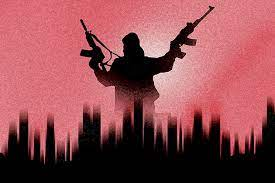

#### Importing Packages and Dataset

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import json
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("globalterrorism.csv")

#### Exploring Dataset

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
df.shape

(181691, 135)

#### Feature Selection for EDA

In [5]:
features = ['iyear','imonth','country_txt','region_txt','provstate','city','suicide','attacktype1_txt',
             'targtype1_txt','gname','weapsubtype1_txt','propvalue','nkill','nwound']

In [6]:
df_new = df[features]

#### Exploratory Data Analysis

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             181691 non-null  int64  
 1   imonth            181691 non-null  int64  
 2   country_txt       181691 non-null  object 
 3   region_txt        181691 non-null  object 
 4   provstate         181270 non-null  object 
 5   city              181257 non-null  object 
 6   suicide           181691 non-null  int64  
 7   attacktype1_txt   181691 non-null  object 
 8   targtype1_txt     181691 non-null  object 
 9   gname             181691 non-null  object 
 10  weapsubtype1_txt  160923 non-null  object 
 11  propvalue         38989 non-null   float64
 12  nkill             171378 non-null  float64
 13  nwound            165380 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 19.4+ MB


In [8]:
df_new.isnull().sum()

iyear                    0
imonth                   0
country_txt              0
region_txt               0
provstate              421
city                   434
suicide                  0
attacktype1_txt          0
targtype1_txt            0
gname                    0
weapsubtype1_txt     20768
propvalue           142702
nkill                10313
nwound               16311
dtype: int64

In [9]:
df_new.describe()

,iyear,imonth,suicide,propvalue,nkill,nwound
count,181691.000000,181691.000000,181691.000000,3.898900e+04,171378.000000,165380.000000
mean,2002.638997,6.467277,0.036507,2.088119e+05,2.403272,3.167668
std,13.259430,3.388303,0.187549,1.552463e+07,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-9.900000e+01,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,-9.900000e+01,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,-9.900000e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,1.000000e+03,2.000000,2.000000
max,2017.000000,12.000000,1.000000,2.700000e+09,1570.000000,8191.000000


In [10]:
df_new.head()

,iyear,imonth,country_txt,region_txt,provstate,city,suicide,attacktype1_txt,targtype1_txt,gname,weapsubtype1_txt,propvalue,nkill,nwound
0,1970,7,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,0,Assassination,Private Citizens & Property,MANO-D,NaN,NaN,1.0,0.0
1,1970,0,Mexico,North America,Federal,Mexico city,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,NaN,0.0,0.0
2,1970,1,Philippines,Southeast Asia,Tarlac,Unknown,0,Assassination,Journalists & Media,Unknown,NaN,NaN,1.0,0.0
3,1970,1,Greece,Western Europe,Attica,Athens,0,Bombing/Explosion,Government (Diplomatic),Unknown,Unknown Explosive Type,NaN,NaN,NaN
4,1970,1,Japan,East Asia,Fukouka,Fukouka,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,NaN,NaN,NaN


#### EDA with Data Visualization

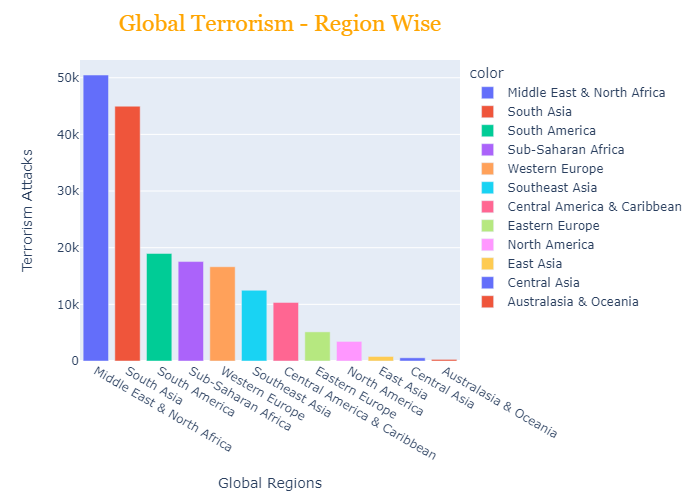

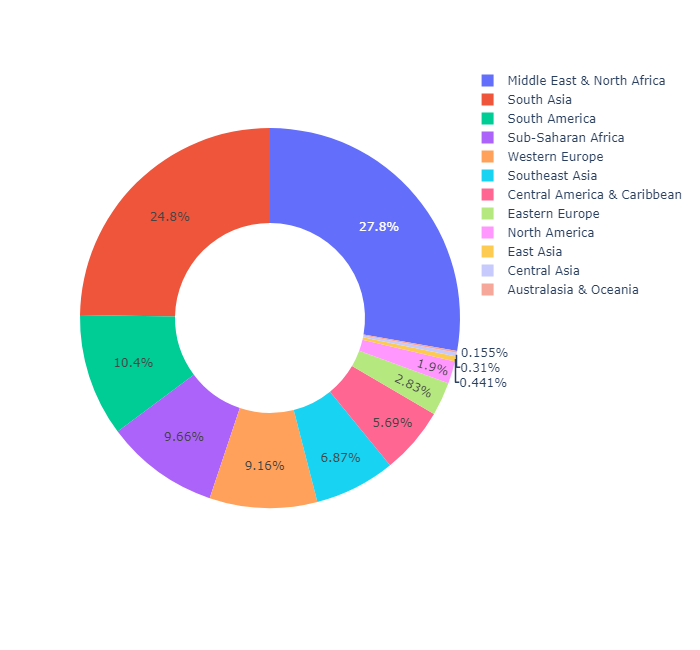

Index(['Middle East & North Africa', 'South Asia', 'South America',
       'Sub-Saharan Africa', 'Western Europe', 'Southeast Asia',
       'Central America & Caribbean', 'Eastern Europe', 'North America',
       'East Asia', 'Central Asia', 'Australasia & Oceania'],
      dtype='object')


In [11]:
region_count = df_new.region_txt.value_counts()
fig = px.bar(x=region_count.keys(),y=region_count,color=region_count.keys(),
                         labels={"x":"Global Regions","y":"Terrorism Attacks"})
fig.update_layout(title={'text':'Global Terrorism - Region Wise','font_color':'orange','font_family':'Georgia','font_size':23,
                         'x':0.4,'y':0.97})
fig.show('png')                 
fig = px.pie(names=region_count.keys(),values=region_count,height=650,hole=0.5)
fig.show('png')
print(region_count.keys())

#### Observation : 
> Globally Most of the terrorism attacks happpened 'Middle East & North Africa' followed by 'South Asia' and 'South America'.

> Around 50% of the total no. of terrorism happened in only 'Middle East & North Africa' and 'South Asia'.

> 'East Asia', 'Central Asia', 'Australasia & Oceania' can be considered as most peaceful regions in the world.

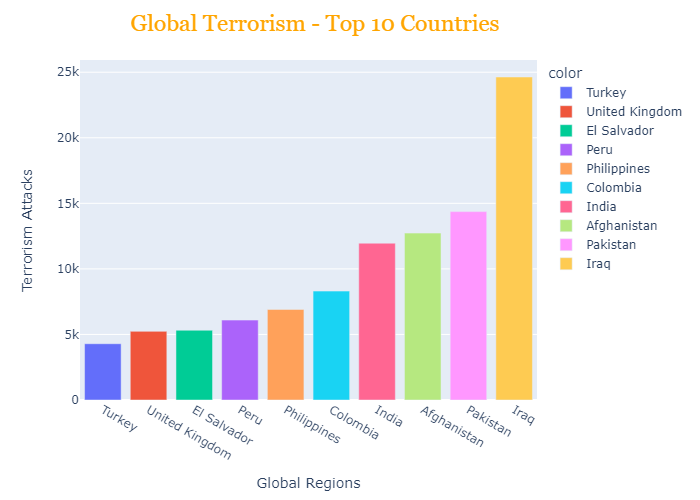

Index(['Turkey', 'United Kingdom', 'El Salvador', 'Peru', 'Philippines',
       'Colombia', 'India', 'Afghanistan', 'Pakistan', 'Iraq'],
      dtype='object')


In [12]:
country_count = df_new.country_txt.value_counts()[:10].sort_values()
fig = px.bar(x=country_count.keys(),y=country_count,color=country_count.keys(),
             labels={"x":"Global Regions","y":"Terrorism Attacks"})
fig.update_layout(title={'text':'Global Terrorism - Top 10 Countries',
                         'font_color':'orange','font_family':'Georgia','font_size':23,'x':0.45,'y':0.97})
fig.show('png') 
print(country_count.keys())

#### Observation :
> 99.5% of the total global terrorism observed within only this 10 countable countries. 

> This countries are the hotspots for any kind global terrorism. 

> Rest all countries can be considered as safe zones.

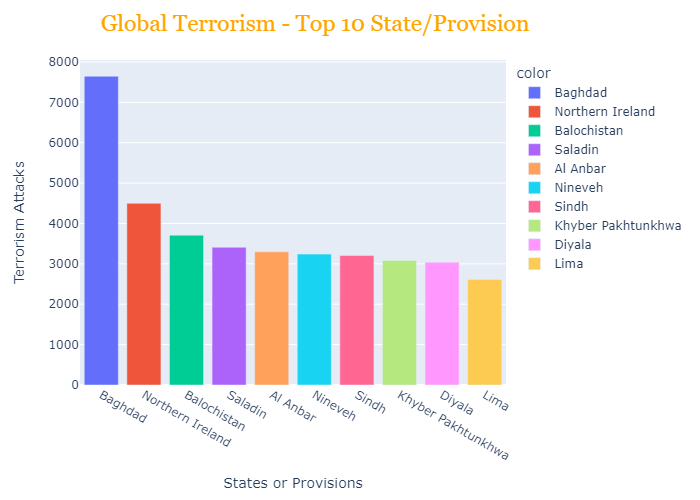

Index(['Baghdad', 'Northern Ireland', 'Balochistan', 'Saladin', 'Al Anbar',
       'Nineveh', 'Sindh', 'Khyber Pakhtunkhwa', 'Diyala', 'Lima'],
      dtype='object')


In [13]:
state_count = df_new.provstate.value_counts()[:11].drop("Unknown")
fig = px.bar(x=state_count.keys(),y=state_count,color=state_count.keys(),
             labels={"x":"States or Provisions","y":"Terrorism Attacks"})
fig.update_layout(title={'text':'Global Terrorism - Top 10 State/Provision',
                         'font_color':'orange','font_family':'Georgia','font_size':23,'x':0.45,'y':0.97})
fig.show('png') 
print(state_count.keys())

#### Observation :
> This are the 10 most terrorism hotspot states globally.

> Around 20% of the total global terrorism observed within this states only.

> Here 'Baghdad', 'Saladin', 'Al Anbar', 'Nineveh', 'Diyala' from 'Iraq'.

>'Balochistan', 'Sindh', 'Khyber Pakhtunkhwa' from 'Pakistan'.

>  'Northern Ireland' from 'United Kingdom' and 'Lima' from 'Peru'

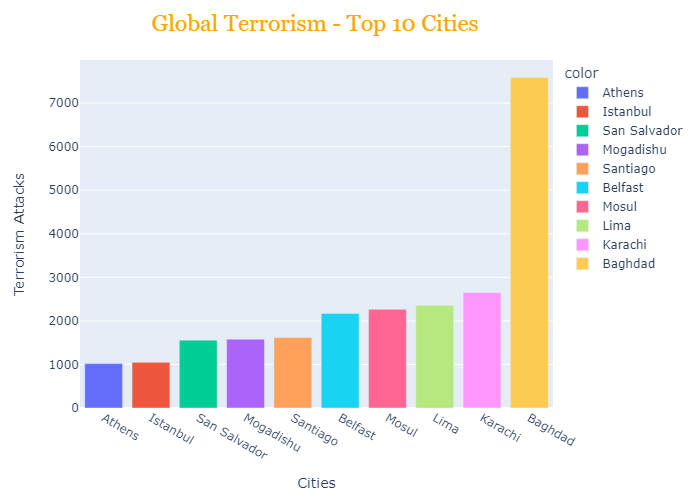

Index(['Athens', 'Istanbul', 'San Salvador', 'Mogadishu', 'Santiago',
       'Belfast', 'Mosul', 'Lima', 'Karachi', 'Baghdad'],
      dtype='object')


In [14]:
city_count = df_new.city.value_counts()[:11].drop('Unknown').sort_values()
fig = px.bar(x=city_count.keys(),y=city_count,color=city_count.keys(),
             labels={"x":"Cities","y":"Terrorism Attacks"})
fig.update_layout(title={'text':'Global Terrorism - Top 10 Cities',
                         'font_color':'orange','font_family':'Georgia','font_size':23,'x':0.45,'y':0.97})
fig.show('png') 
print(city_count.keys())

#### Observation ;
> Around 13% of the total global terrorism observed within this cities only.

> Baghdad' is the only city from where more than 4% of the total Global Terrorism observed.

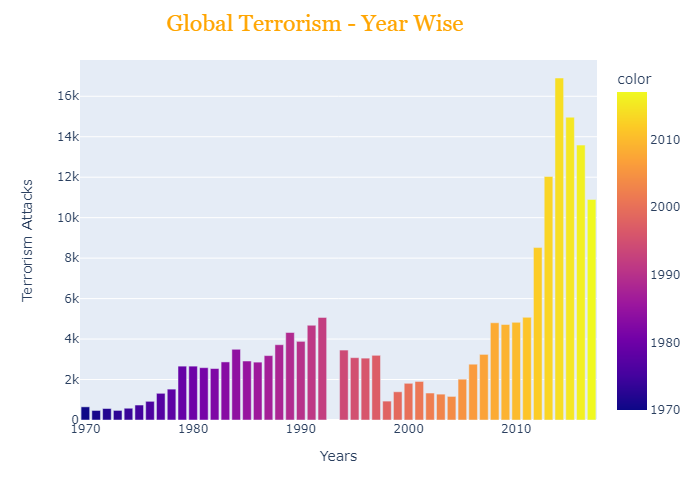

In [15]:
year_count = df_new.iyear.value_counts()
fig = px.bar(x=year_count.keys(),y=year_count,color=year_count.keys(),labels={"x":"Years","y":"Terrorism Attacks"})
fig.update_layout(title={'text':'Global Terrorism - Year Wise','font_color':'orange','font_family':'Georgia',
                         'font_size':23,'x':0.45,'y':0.97})
fig.show('png')

#### Observation :
> As per this Barplot, we can oobserved the following points :
    
    > From 1970 to 1992, the global terrorism trends increases gradually.
    > Only in 1993, their is no such cases recorded as per the dataset.
    > From 1994 to 2008, the global terrorism trends decreases at the begining and again increases after 2004.
    > From 2008 to 2014, the global terrorism trends increases exponentially.
    > From 2014 to 2017, the global terrorism trends decreases exponentially.
> But aggregately we can conclude that as the year increases global terrorism increases rapidly and from past few years this trends maximum.

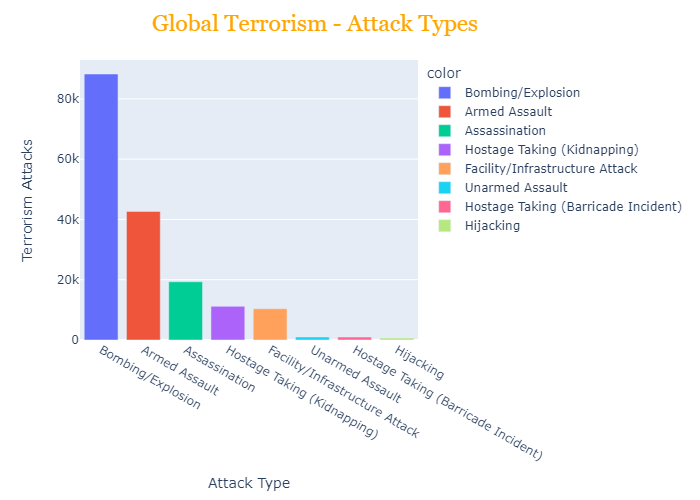

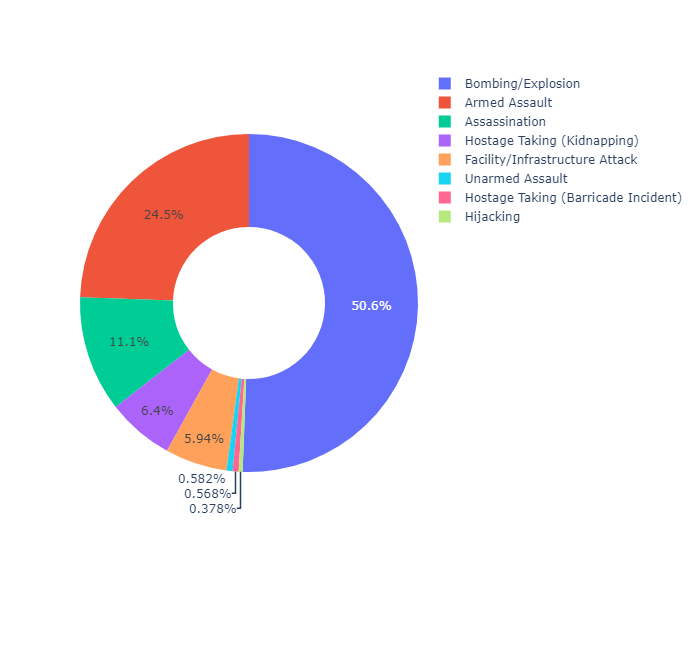

Index(['Bombing/Explosion', 'Armed Assault', 'Assassination',
       'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack',
       'Unarmed Assault', 'Hostage Taking (Barricade Incident)', 'Hijacking'],
      dtype='object')


In [16]:
atktype_count = df_new.attacktype1_txt.value_counts().drop("Unknown")
fig = px.bar(x=atktype_count.keys(),y=atktype_count,color=atktype_count.keys(),
             labels={"x":"Attack Type","y":"Terrorism Attacks"})
fig.update_layout(title={'text':'Global Terrorism - Attack Types','font_color':'orange','font_family':'Georgia',
                         'font_size':23,'x':0.45,'y':0.97})
fig.show('png')
fig = px.pie(names=atktype_count.keys(),values=atktype_count,hole=0.45,height=650)
fig.show('png')
print(atktype_count.keys())

#### Observation :
> Almost half of the terrorism cases, Bombing or Explosion used as the primary attack type.

> Other than Bombing there 'Armed Assault', 'Assassination', 'Kidnapping' etc also used as famous attack types.

> There are very less cases of 'Hijacking', 'Barricade Incident' and 'Unarmed Assault' in terrorism.

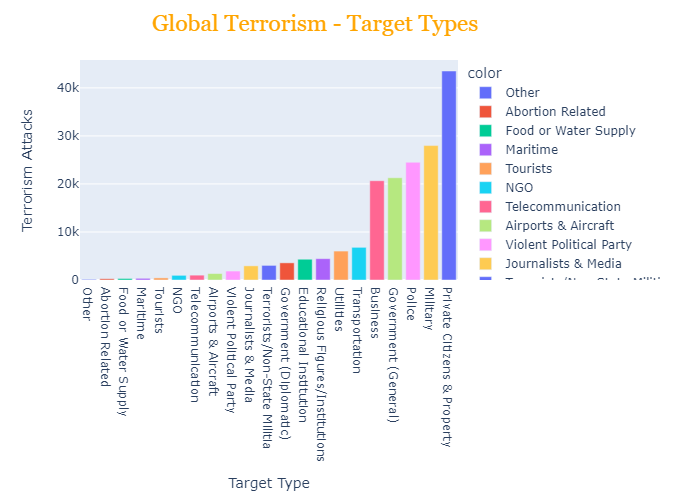

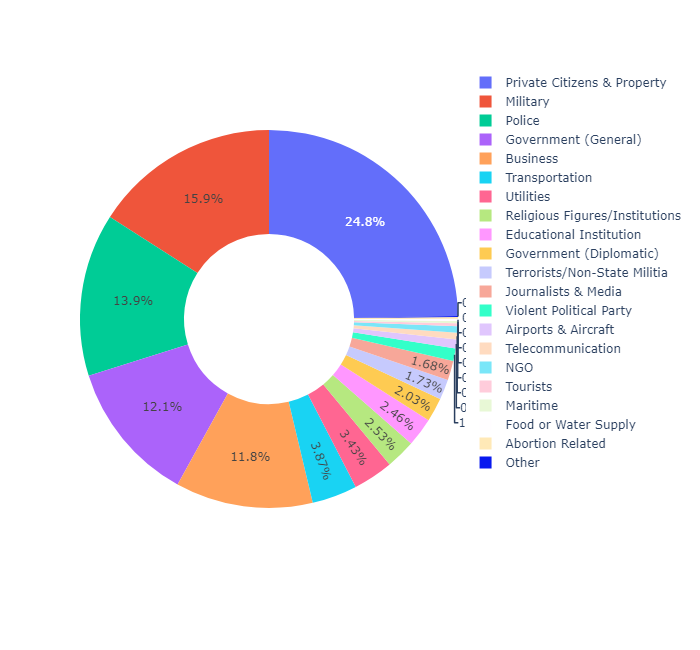

Index(['Other', 'Abortion Related', 'Food or Water Supply', 'Maritime',
       'Tourists', 'NGO', 'Telecommunication', 'Airports & Aircraft',
       'Violent Political Party', 'Journalists & Media',
       'Terrorists/Non-State Militia', 'Government (Diplomatic)',
       'Educational Institution', 'Religious Figures/Institutions',
       'Utilities', 'Transportation', 'Business', 'Government (General)',
       'Police', 'Military', 'Private Citizens & Property'],
      dtype='object')


In [17]:
trgtype_count = df_new.targtype1_txt.value_counts().sort_values().drop("Unknown")
fig = px.bar(x=trgtype_count.keys(),y=trgtype_count,color=trgtype_count.keys(),
             labels={"x":"Target Type","y":"Terrorism Attacks"})
fig.update_layout(title={'text':'Global Terrorism - Target Types','font_color':'orange','font_family':'Georgia',
                         'font_size':23,'x':0.45,'y':0.97})
fig.show('png')
fig = px.pie(names=trgtype_count.keys(),values=trgtype_count,hole=0.45,height=650)
fig.show('png')
print(trgtype_count.keys())

#### Observation : 
> More than 75% of global terrorism cases attackers targeted 'Business', 'Government (General)', 'Police', 'Military', and 'Private Citizens & Property' areas.

> 'Abortion Related', 'Food or Water Supply', 'Maritime',
       'Tourists', 'NGO', 'Telecommunication' are some areas where attackers may not like to attack.

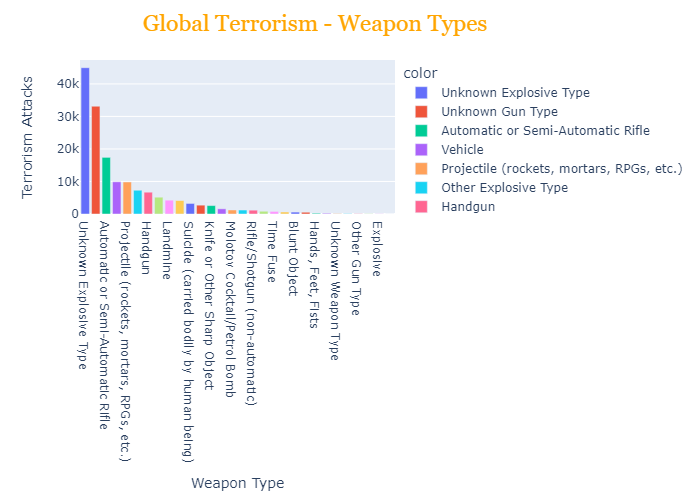

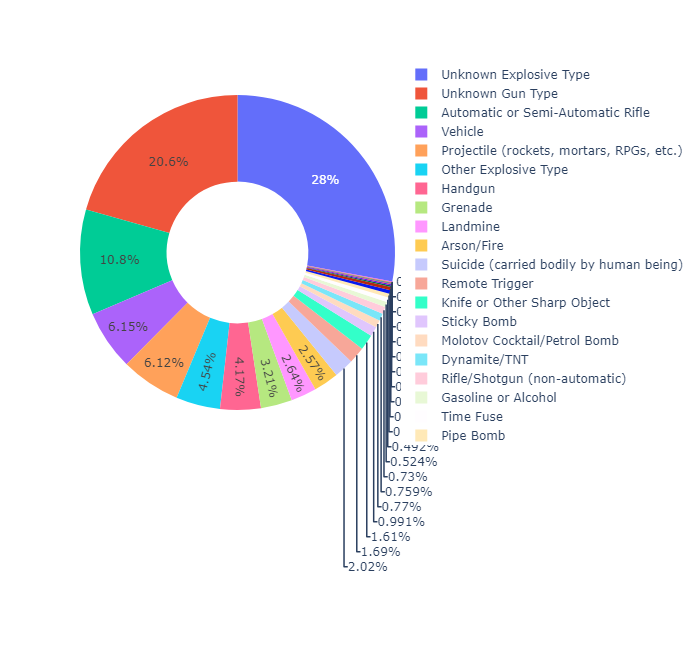

Index(['Unknown Explosive Type', 'Unknown Gun Type',
       'Automatic or Semi-Automatic Rifle', 'Vehicle',
       'Projectile (rockets, mortars, RPGs, etc.)', 'Other Explosive Type',
       'Handgun', 'Grenade', 'Landmine', 'Arson/Fire',
       'Suicide (carried bodily by human being)', 'Remote Trigger',
       'Knife or Other Sharp Object', 'Sticky Bomb',
       'Molotov Cocktail/Petrol Bomb', 'Dynamite/TNT',
       'Rifle/Shotgun (non-automatic)', 'Gasoline or Alcohol', 'Time Fuse',
       'Pipe Bomb', 'Blunt Object', 'Letter Bomb', 'Hands, Feet, Fists',
       'Pressure Trigger', 'Unknown Weapon Type',
       'Rope or Other Strangling Device', 'Other Gun Type', 'Poisoning',
       'Explosive', 'Suffocation'],
      dtype='object')


In [18]:
wpntype_count = df_new.weapsubtype1_txt.value_counts()
fig = px.bar(x=wpntype_count.keys(),y=wpntype_count,color=wpntype_count.keys(),
             labels={"x":"Weapon Type","y":"Terrorism Attacks"})
fig.update_layout(title={'text':'Global Terrorism - Weapon Types','font_color':'orange','font_family':'Georgia',
                         'font_size':23,'x':0.45,'y':0.97})
fig.show('png')
fig = px.pie(names=wpntype_count.keys(),values=wpntype_count,hole=0.45,height=650)
fig.show('png')
print(wpntype_count.keys())

#### Observation :
> Attackers mostly used 'Unknown Explosive Type', 'Unknown Gun Type', 'Automatic or Semi-Automatic Rifle' that observed in almost 60% cases.

> 'Sticky Bomb', Molotov Cocktail/Petrol Bomb', 'Dynamite/TNT',
       'Rifle/Shotgun (non-automatic)', 'Gasoline or Alcohol', 'Time Fuse',
       'Pipe Bomb', 'Blunt Object', 'Letter Bomb', 'Hands, Feet, Fists',
       'Pressure Trigger', 'Unknown Weapon Type',
       'Rope or Other Strangling Device', 'Other Gun Type', 'Poisoning',
       'Explosive', 'Suffocation' are weapons that attackers used rarely.

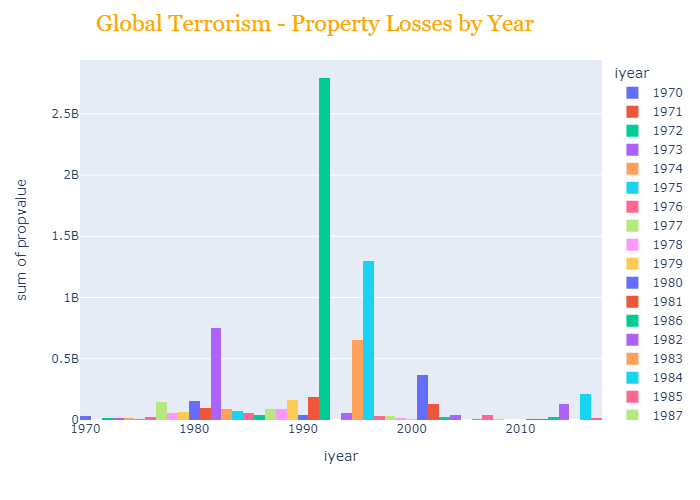

In [19]:
fig = px.histogram(data_frame=df_new,x='iyear',y='propvalue',color='iyear')
fig.update_layout(title={'text':'Global Terrorism - Property Losses by Year','font_color':'orange','font_family':'Georgia',
                         'font_size':23,'x':0.45,'y':0.97})
fig.show('png')

#### Observation :
> In year <b>1992</b> the aggregeted property loss was highest with total worth over <b>2.5 Billion.


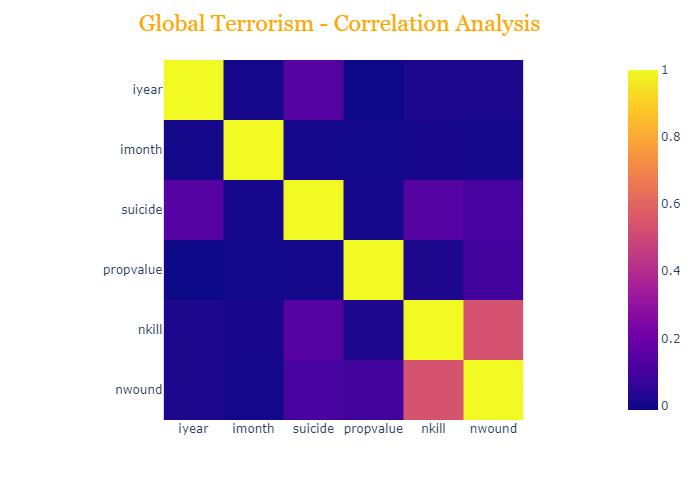

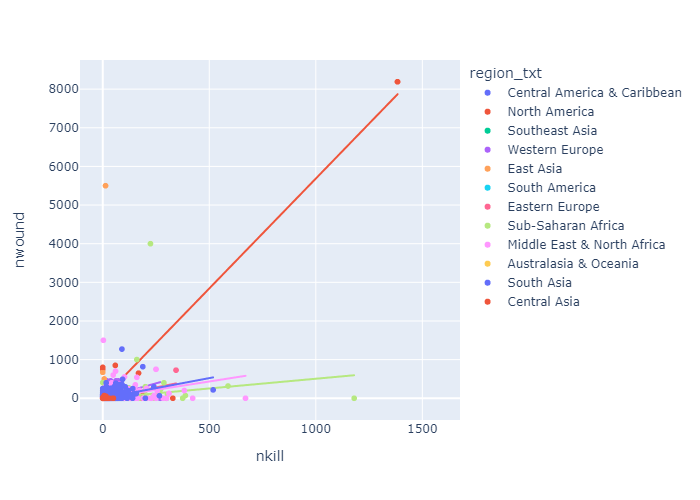

In [20]:
fig = px.imshow(df_new.corr())
fig.update_layout(title={'text':'Global Terrorism - Correlation Analysis','font_color':'orange','font_family':'Georgia',
                         'font_size':23,'x':0.485,'y':0.97})
fig.show('png')
px.scatter(data_frame=df_new,x='nkill',y='nwound',trendline='ols',color='region_txt').show('png')

#### Observation :
> As per the above, only nwound and nkill features has a significant positve correletion where nkil shows the number peoples killed at that attack and nwound shows the number of peoples wounded at thet attack.

> No other feature has any correletion with others.

#### Chloropleth Analysis

In [21]:
geo = json.load(open('countries.geo.json','r'))
country_id = {}
for feature in geo['features']:
    country_id[feature['properties']['name']] = feature['id']
df_new['country_id'] = df_new.country_txt.map(country_id)

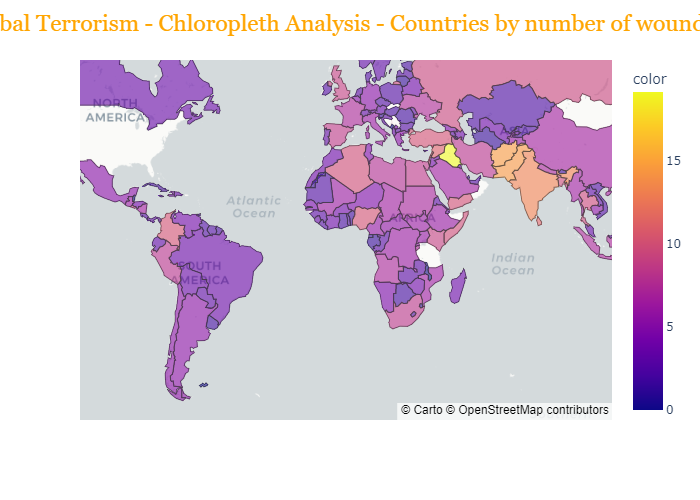

In [22]:
fig = px.choropleth_mapbox(geojson=geo,locations=df_new.groupby('country_id')['nwound'].sum().to_dict().keys(),
              color=(df_new.groupby('country_id')['nwound'].sum()**0.25).to_dict().values(),
              hover_name=df_new.groupby('country_id')['country_txt'].unique(),
              hover_data={'No. of Wound':(df_new.groupby('country_id')['nwound'].sum()).to_dict().values()},
                    mapbox_style='carto-positron',zoom=0.75,opacity=0.6)
fig.update_layout(title={'text':'Global Terrorism - Chloropleth Analysis - Countries by number of wounds','font_color':'orange',
                         'font_family':'Georgia','font_size':23,'x':0.485,'y':0.97})
fig.show('png')

#### Observation :
> On analysing the above chloropleth map, <b>Iraq</b> is observed the most number wounds for global terrorism followed by <b>Afganistan</b>,<b> Pakistan </b>and <b>India</b>.

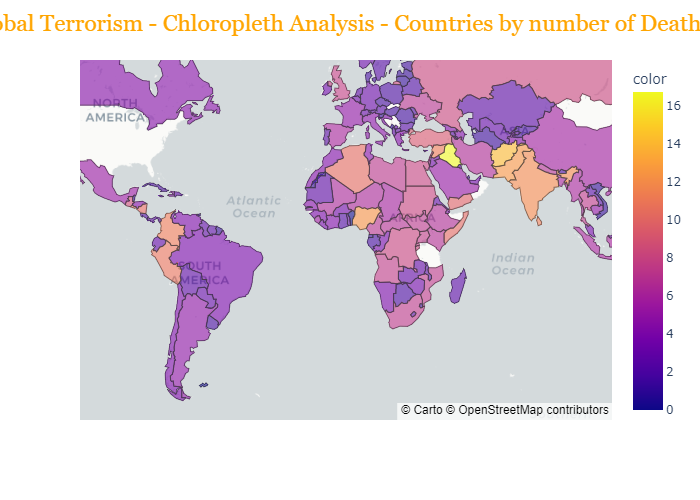

In [23]:
fig = px.choropleth_mapbox(geojson=geo,locations=df_new.groupby('country_id')['nkill'].sum().to_dict().keys(),
              color=(df_new.groupby('country_id')['nkill'].sum()**0.25).to_dict().values(),
              hover_name=df_new.groupby('country_id')['country_txt'].unique(),
              hover_data={'No. of kill':(df_new.groupby('country_id')['nkill'].sum()).to_dict().values()},
                    mapbox_style='carto-positron',zoom=0.75,opacity=0.6)
fig.update_layout(title={'text':'Global Terrorism - Chloropleth Analysis - Countries by number of Deaths','font_color':'orange',
                         'font_family':'Georgia','font_size':23,'x':0.485,'y':0.97})
fig.show('png')

#### Observation :
> On analysing the above chloropleth map, <b>Iraq</b> is observed the most number peoples killed for global terrorism followed by <b>Afganistan</b>, <b>Pakistan</b> and <b>India.

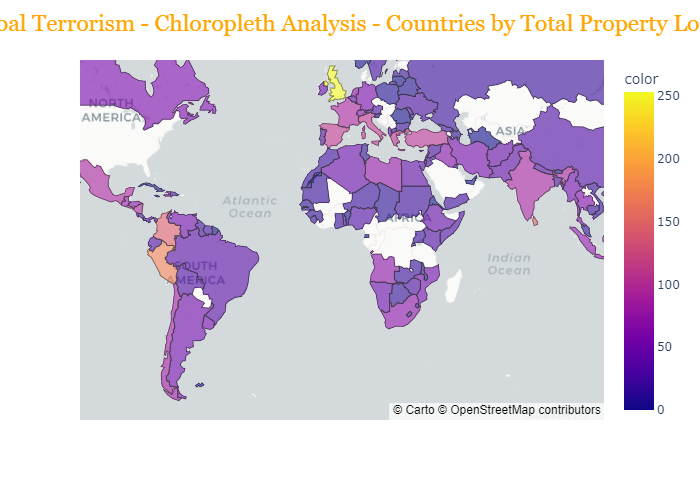

In [24]:
fig = px.choropleth_mapbox(geojson=geo,locations=df_new.groupby('country_id')['propvalue'].sum().to_dict().keys(),
              color=(df_new.groupby('country_id')['propvalue'].sum()**0.25).to_dict().values(),
              hover_name=df_new.groupby('country_id')['country_txt'].unique(),
              hover_data={'Total Property Loss':(df_new.groupby('country_id')['propvalue'].sum()).to_dict().values()},
                    mapbox_style='carto-positron',zoom=0.75,opacity=0.6)
fig.update_layout(title={'text':'Global Terrorism - Chloropleth Analysis - Countries by Total Property Loss',
                         'font_color':'orange','font_family':'Georgia','font_size':23,'x':0.485,'y':0.97})
fig.show('png')

#### Observation :
> On analysing the above chloropleth map, <b>United Kingdom</b> is observed the highest loss of Property by values for global terrorism followed by <b>Peru</b> and <b>Colombia.

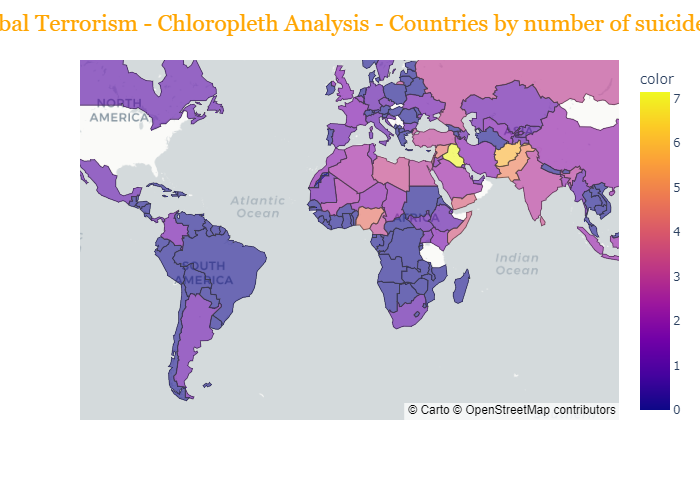

In [25]:
fig = px.choropleth_mapbox(geojson=geo,locations=df_new.groupby('country_id')['suicide'].sum().to_dict().keys(),
              color=(df_new.groupby('country_id')['suicide'].sum()**0.25).to_dict().values(),
              hover_name=df_new.groupby('country_id')['country_txt'].unique(),
              hover_data={'No. of Suicides':(df_new.groupby('country_id')['suicide'].sum()).to_dict().values()},
                    mapbox_style='carto-positron',zoom=0.75,opacity=0.6)
fig.update_layout(title={'text':'Global Terrorism - Chloropleth Analysis - Countries by number of suicides',
                         'font_color':'orange','font_family':'Georgia','font_size':23,'x':0.485,'y':0.97})
fig.show('png')

#### Observation :
> On analysing the above chloropleth map, <b>Iraq </b>is observed the most number suicides for global terrorism followed by <b>Afganistan</b> and<b> Pakistan.

>
>
>

#### This are the top 100 attackers list based on their attack counts :

In [26]:
top_gangs = df_new.gname.value_counts().drop('Unknown')[:100]
pd.DataFrame({'Gang Names':top_gangs.keys(),'Attack Counts':top_gangs.to_dict().values()})

,Gang Names,Attack Counts
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
5,New People's Army (NPA),2772
6,Irish Republican Army (IRA),2671
7,Revolutionary Armed Forces of Colombia (FARC),2487
8,Boko Haram,2418
9,Kurdistan Workers' Party (PKK),2310


#### Here is top 20 terrorist attacks records based on no. of kills and wounds

In [27]:
df_new.sort_values(by=["nkill","nwound","suicide"],ascending=False).iloc[:20][["country_txt","city","iyear","gname","nkill","nwound","suicide"]]

,country_txt,city,iyear,gname,nkill,nwound,suicide
133518,Iraq,Tikrit,2014,Islamic State of Iraq and the Levant (ISIL),1570.0,NaN,0
73126,United States,New York City,2001,Al-Qaida,1384.0,8190.0,1
73127,United States,New York City,2001,Al-Qaida,1383.0,8191.0,1
55934,Rwanda,Gikoro,1994,Hutu extremists,1180.0,0.0,0
136283,Iraq,Sinjar,2014,Islamic State of Iraq and the Levant (ISIL),953.0,NaN,0
133225,Iraq,Badush,2014,Islamic State of Iraq and the Levant (ISIL),670.0,0.0,0
179671,Somalia,Mogadishu,2017,Al-Shabaab,588.0,316.0,1
76347,Nepal,Dhading district,2004,Communist Party of Nepal- Maoist (CPN-M),518.0,216.0,0
136746,Syria,Unknown,2014,Islamic State of Iraq and the Levant (ISIL),517.0,NaN,0
170198,Syria,Palmyra,2016,Islamic State of Iraq and the Levant (ISIL),433.0,NaN,1


>

>

>

## Overall Conclusion : 

> There are only some countable countries, where most of the global terrorism occurs and wihin this countries few states or cities can be considered as hotspots for almost every attacks. Iraq and Pakistan is two most global terrorism hotspot.
Most of the states of Iraq and Pakistan observed in the top 10 global terrorism state wise analysis like Baghdad from Iraq and Balochistan from pakistan. Taliban and ISIL like gangs are the major attackers in pakistan and Iraq respectively. According to the captured dataset, in top 20 terrorism attacks Iraq repeated 5 times in terms of number of people kills in each attacks. 
Attackers basically targets to attack to 'Business', 'Government (General)', 'Police', 'Military', and 'Private Citizens & Property' like areas. Almost half of the terrorism cases, Bombing or Explosion used as the primary attack type. They mostly used 'Unknown Explosive Type', 'Unknown Gun Type', 'Automatic or Semi-Automatic Rifle'. Except this all, we also observed that as the year increase the frequency of attacks also increases but property losses by values decreases. 

# <center>Thank You

 ..........................................................................................................................................................................................................................................................